# <center><bold> Modelo de clasificación para la enfermedad de Parkinson </bold></center>

### Entre las afecciones que se generan debido a la enfermedad de Parkinson (EP), destaca la disartria, la cuál impide impide al paciente gesticular correctamente las palabras al hablar, pues los músculos involucrados en dicha función se ven afectados. La disartría puede estar siendo el resultado de las alteraciones de una o más regiones subcorticales implicadas en funciones motoras, como lo són el cerebelo, el tronco encefálico o los ganglios basales.

### Las personas que padecen esta enfermedad suelen hablar de forma lenta, con un tono más monótono, o con menos fuerza en la voz, pero por sobre todo con muchas impresiciones al momento de articular, lo que genera temblores y tartamudeo.

### El conjunto de datos que se presenta a continuación se compone de 195 registros, algunos de ellos corresponden a personas que presentan EP y otros que no. La definición y clasificación de las variables o columnas se presenta a continuación:

- name - Nombre del sujeto ASCII y número de grabación
-   MDVP:Fo(Hz) - Frecuencia fundamental vocal promedio
-   MDVP:Fhi(Hz) - Frecuencia fundamental vocal máxima
-   MDVP:Flo(Hz) - Frecuencia fundamental vocal mínima
-   MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Varias medidas de variación en la frecuencia fundamental
-    MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Varias medidas de variación en amplitud.
-    NHR,HNR - Dos medidas de relación de ruido a componentes tonales en la voz.
-    status - Estado de salud del sujeto (uno) - Parkinson, (cero) - saludable
-    RPDE,D2 - Dos medidas de complejidad dinámica no lineal
-    DFA - Exponente de escala fractal de señal
-    spread1,spread2,PPE - Tres medidas no lineales de variación de frecuencia fundamental


In [1]:
# Paquetes necesarios

from IPython.display import clear_output
!pip3 install -U lazypredict
!pip3 install -U Jinja2==3
!pip3 install -U pandas #Upgrading pandas
clear_output()

In [2]:
!python -c "import jinja2 as jd; print(jd.__version__)"

3.0.0


In [3]:
# Librerias

import pandas as pd
import seaborn as sns
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler # Transform data such that its distribution will have a mean value 0 and sd of 1
from sklearn.model_selection import StratifiedKFold, train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier


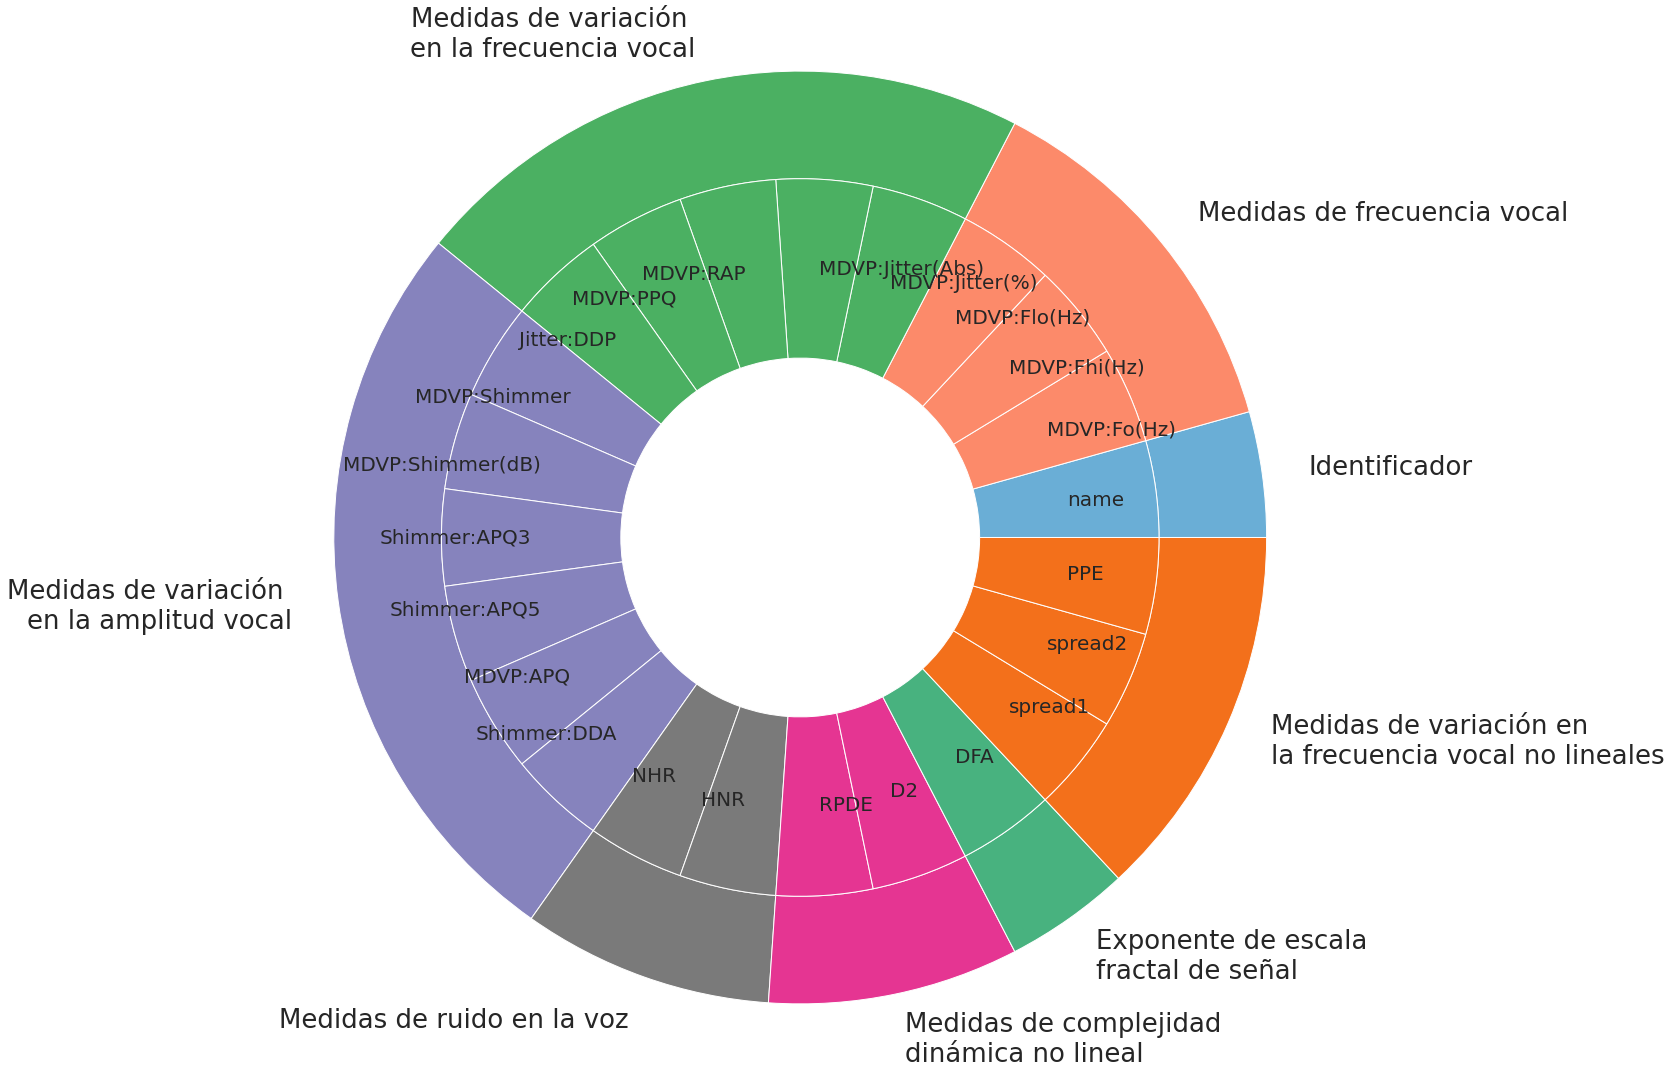

In [149]:
# Clasificación de las variables, son 8 grupos con 23 subgrupos.

group_names=['Identificador','Medidas de frecuencia vocal', 'Medidas de variación \nen la frecuencia vocal',
             'Medidas de variación \nen la amplitud vocal', 'Medidas de ruido en la voz',
             'Medidas de complejidad \ndinámica no lineal', 'Exponente de escala \nfractal de señal',
             'Medidas de variación en \nla frecuencia vocal no lineales']

group_size=[4,12,20,24,8,8,4,12]

subgroup_names=['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', "MDVP:Jitter(%)",
                "MDVP:Jitter(Abs)", "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP",
                "MDVP:Shimmer","MDVP:Shimmer(dB)", "Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA",
                "NHR","HNR","RPDE","D2","DFA","spread1","spread2","PPE"]

subgroup_size=[4]*23
 
# Colores
a, b, c, d, e, f, g, h = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples, plt.cm.Greys, plt.cm.PuRd, plt.cm.BuGn, plt.cm.Oranges]
 
# Primer anillo (externo)
fig, ax = plt.subplots()
fig.set_size_inches(22.5, 16.5)

ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.5), b(0.4), c(0.6), d(0.6), e(0.6), f(0.6), g(0.6), h(0.6)],  
                  textprops={'fontsize': 26} )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Segundo anillo (interno)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, 
                   labeldistance=0.75, colors=[a(0.5), b(0.4), b(0.4), b(0.4), 
                                              c(0.6), c(0.6), c(0.6), c(0.6), c(0.6),
                                              d(0.6), d(0.6), d(0.6), d(0.6), d(0.6), d(0.6),
                                              e(0.6), e(0.6),
                                              f(0.6), f(0.6),
                                              g(0.6),
                                              h(0.6), h(0.6), h(0.6)],
                  textprops={'fontsize': 20})

plt.setp( mypie2, width=0.5, edgecolor='white')
plt.margins(0,0)
plt.show()

In [5]:
# Load data
df = pd.read_csv('parkinson.csv')
pd.set_option('display.max_columns', None)

df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.99,157.30,75.00,0.01,0.00,0.00,0.01,0.01,0.04,0.43,0.02,0.03,0.03,0.07,0.02,21.03,1,0.41,0.82,-4.81,0.27,2.30,0.28
1,phon_R01_S01_2,122.40,148.65,113.82,0.01,0.00,0.00,0.01,0.01,0.06,0.63,0.03,0.05,0.04,0.09,0.02,19.09,1,0.46,0.82,-4.08,0.34,2.49,0.37
2,phon_R01_S01_3,116.68,131.11,111.56,0.01,0.00,0.01,0.01,0.02,0.05,0.48,0.03,0.04,0.04,0.08,0.01,20.65,1,0.43,0.83,-4.44,0.31,2.34,0.33
3,phon_R01_S01_4,116.68,137.87,111.37,0.01,0.00,0.01,0.01,0.02,0.05,0.52,0.03,0.04,0.04,0.09,0.01,20.64,1,0.43,0.82,-4.12,0.33,2.41,0.37
4,phon_R01_S01_5,116.01,141.78,110.66,0.01,0.00,0.01,0.01,0.02,0.06,0.58,0.03,0.05,0.04,0.10,0.02,19.65,1,0.42,0.82,-3.75,0.23,2.33,0.41


In [6]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

# Exploración de los datos 

###   Subgrupos de la variable "name"

In [8]:
print(df["name"].str[:11].unique().shape[0], "\n")
print(df["name"].str[:11].value_counts())

6 

phon_R01_S2    44
phon_R01_S3    43
phon_R01_S0    42
phon_R01_S1    36
phon_R01_S4    24
phon_R01_S5     6
Name: name, dtype: int64


##### Por el momento no representan mayor relevancia

### Renombre de algunas columnas

In [9]:
df.rename(columns = { 'MDVP:Fo(Hz)':'avg_freq', 
                      'MDVP:Fhi(Hz)':'max_freq', 
                      'MDVP:Flo(Hz)':'min_freq' }, inplace = True)

### Distribución de las variables numéricas

In [10]:
df.describe().T.sort_values(by='std', ascending=False)\
                    .style.background_gradient(cmap='GnBu')\
                    .bar(subset=["max"], color='#BB0000')\
                    .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
max_freq,195.000000,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
min_freq,195.000000,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
avg_freq,195.000000,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
HNR,195.000000,21.885974,4.425764,8.441000,19.198000,22.085000,25.075500,33.047000
spread1,195.000000,-5.684397,1.090208,-7.964984,-6.450096,-5.720868,-5.046192,-2.434031
status,195.000000,0.753846,0.431878,0.000000,1.000000,1.000000,1.000000,1.000000
D2,195.000000,2.381826,0.382799,1.423287,2.099125,2.361532,2.636456,3.671155
MDVP:Shimmer(dB),195.000000,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000
RPDE,195.000000,0.498536,0.103942,0.256570,0.421306,0.495954,0.587562,0.685151
PPE,195.000000,0.206552,0.090119,0.044539,0.137451,0.194052,0.252980,0.527367


##### Las medidas de frecuencia junto con 'HNR' y 'spread1' presentan varianzas interesantes 

#### Histogramas de las variables numericas clasificadas por 'status'

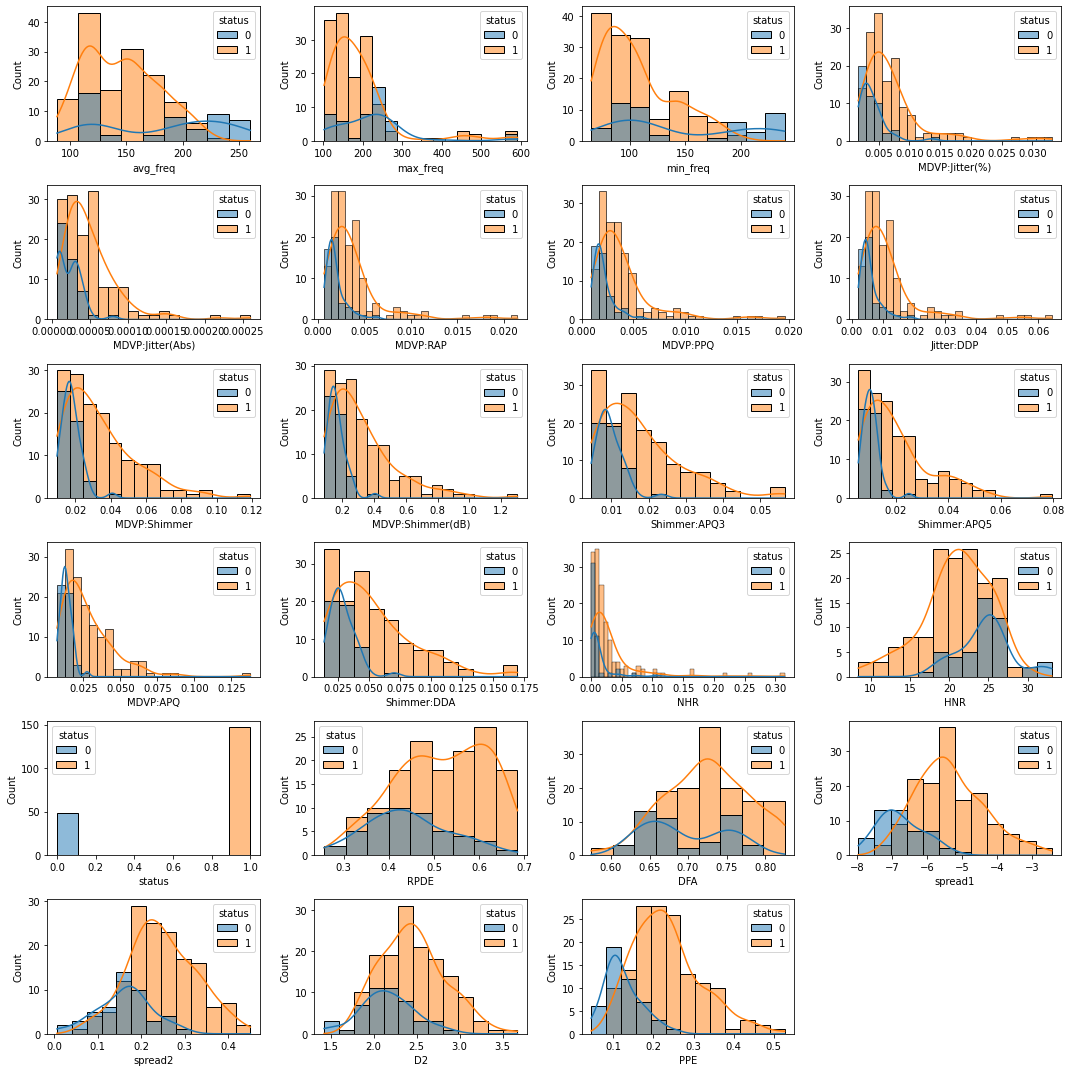

In [11]:
numeric_columns = list(df.select_dtypes(include=[np.number]).columns.values)

fig = plt.figure(figsize=(15,15))
for i in range(len(numeric_columns)):
    plt.subplot(6,4,i+1)
    sns.histplot(data=df, x=numeric_columns[i], kde=True, hue="status")
    
plt.tight_layout()
plt.show()

#### Discución

- spread1 y PPE parecieran mostrar una correlación alta con status
- Las variables de tipo Shimmer y MDVP parecen estar altamente relacionadas entre ellas, por lo que no estaría mal quitar algunas de ellas.

#### Matriz de correlaciones 

<AxesSubplot:>

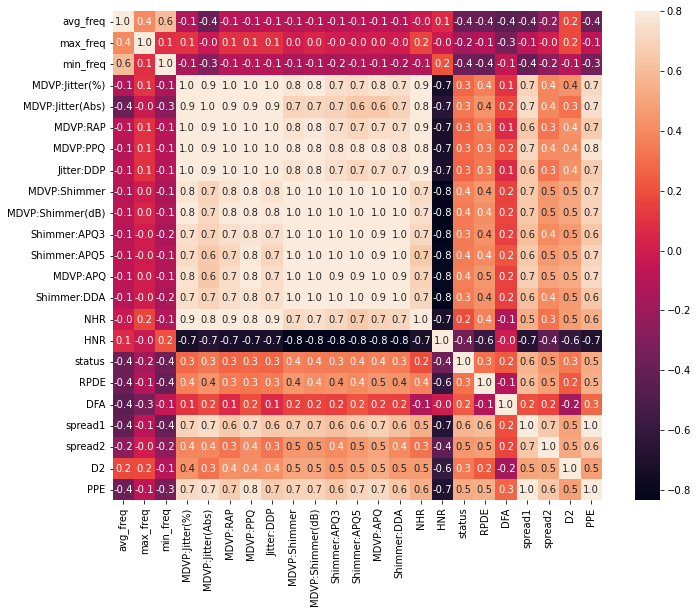

In [12]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, annot=True, fmt="1.1f", vmax=.8, square=True)

#### Mayores correlaciones con 'status' 

In [125]:
import pandas as pd

# Creating the Pandas index
index = pd.Index(['Car','Bike','Airplane','Ship','Truck'])

# Display the index
print("Pandas Index...\n",index)

# Return the dtype of the data
print("\nThe dtype object...\n",index.dtype)

# Insert a new value at the first index from the last using the insert() method.
# The first parameter in the insert() is the location where the new index value is placed.
# The -1 here means the new index value gets inserted at the first index from the last.
# The second parameter is the new index value to be inserted.
print("\nAfter inserting a new index value...\n", index.insert(-1, 'Suburban'))

Pandas Index...
 Index(['Car', 'Bike', 'Airplane', 'Ship', 'Truck'], dtype='object')

The dtype object...
 object

After inserting a new index value...
 Index(['Car', 'Bike', 'Airplane', 'Ship', 'Suburban', 'Truck'], dtype='object')


In [131]:
import pandas as pd

a = pd.Index(['surco'])
a = a.insert(-1, 'epa')

# if isinstance(b, (list, tuple)):
#     print('yeah')
#     a += b
# else:
#     print('no yeah')

print(a)
# a.append(b)
# print(a)

Index(['epa', 'surco'], dtype='object')


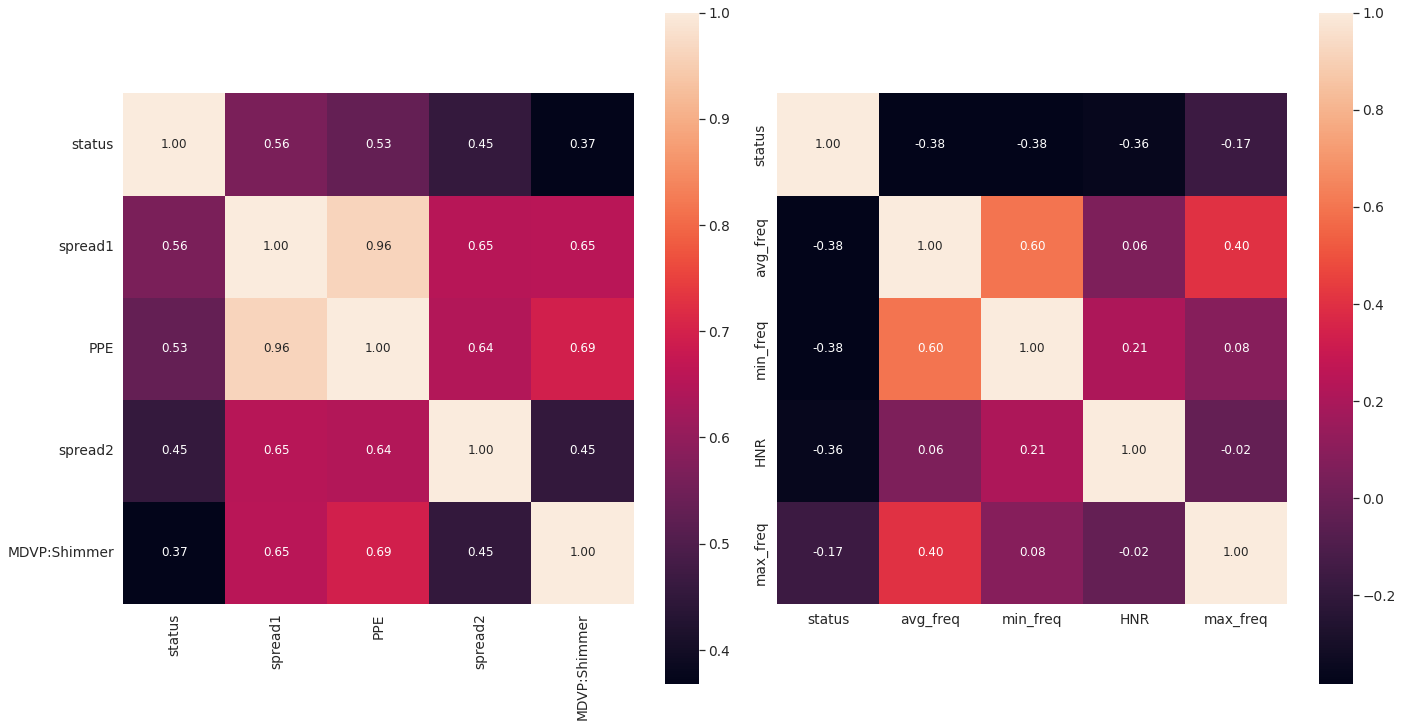

In [150]:
fig = plt.figure(figsize=(20,20))

# Correlaciones positivas
plt.subplot(2,2,1)

k = 5 # Number of variables for heatmap
cols = corrmat.nlargest(k, 'status')['status'].index # Sort correlations by highest value
cm = np.corrcoef(df[cols].values.T) # Param must be transposed
sns.set(font_scale=1.25) # Font size of graph variables
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size' : 12}, yticklabels=cols.values, xticklabels=cols.values)

# Correlaciones negativas
plt.subplot(2,2,2)

k = 4 # Number of variables for heatmap
cols = corrmat.nsmallest(k, 'status')['status'].index # Sort correlations by smallest value
cols = cols.insert(0, 'status')
cm = np.corrcoef(df[cols].values.T) # Param must be transposed
sns.set(font_scale=1.25) # Font size of graph variables
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size' : 12}, yticklabels=cols.values, xticklabels=cols.values)

plt.tight_layout()
plt.show()


#### - Entre las medidas de variación en frecuencia y amplotud vocal, vemos a MDVP:Shimmer como la mayor correlacionada con 'status', por lo que podemos deshacermos del resto, sin embargo su correlación sigue siendo baja, por lo que talvez no sea conveniente considerarla.
#### - Por otro lado, tanto avg_freq como min_freq presentan la misma correlatividad negativa, por lo que podríamos escoger tan solo una de ellas.

In [14]:
df.drop(["MDVP:Jitter(%)",
         "MDVP:Jitter(Abs)", "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP",
         "MDVP:Shimmer(dB)", "Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA"], axis=1)

,name,avg_freq,max_freq,min_freq,MDVP:Shimmer,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.99,157.30,75.00,0.04,0.02,21.03,1,0.41,0.82,-4.81,0.27,2.30,0.28
1,phon_R01_S01_2,122.40,148.65,113.82,0.06,0.02,19.09,1,0.46,0.82,-4.08,0.34,2.49,0.37
2,phon_R01_S01_3,116.68,131.11,111.56,0.05,0.01,20.65,1,0.43,0.83,-4.44,0.31,2.34,0.33
3,phon_R01_S01_4,116.68,137.87,111.37,0.05,0.01,20.64,1,0.43,0.82,-4.12,0.33,2.41,0.37
4,phon_R01_S01_5,116.01,141.78,110.66,0.06,0.02,19.65,1,0.42,0.82,-3.75,0.23,2.33,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.19,230.98,94.26,0.04,0.03,19.52,0,0.45,0.66,-6.54,0.12,2.66,0.13
191,phon_R01_S50_3,209.52,253.02,89.49,0.03,0.02,19.15,0,0.43,0.68,-6.20,0.13,2.78,0.17
192,phon_R01_S50_4,174.69,240.00,74.29,0.02,0.11,17.88,0,0.41,0.66,-6.79,0.16,2.68,0.13
193,phon_R01_S50_5,198.76,396.96,74.90,0.02,0.07,19.02,0,0.45,0.64,-6.74,0.21,2.14,0.12


#### Selección de variables para el entrenamiento 

In [151]:
TARGET = 'status'
FEATURES = [col for col in df.columns if col != TARGET]
RANDOM_STATE = 12

#X = df.drop(TARGET, axis = 1)

X = df[['avg_freq','spread1', 'spread2', 'PPE']]
y = df[TARGET]

X


,avg_freq,spread1,spread2,PPE
0,119.99,-4.81,0.27,0.28
1,122.40,-4.08,0.34,0.37
2,116.68,-4.44,0.31,0.33
3,116.68,-4.12,0.33,0.37
4,116.01,-3.75,0.23,0.41
...,...,...,...,...
190,174.19,-6.54,0.12,0.13
191,209.52,-6.20,0.13,0.17
192,174.69,-6.79,0.16,0.13
193,198.76,-6.74,0.21,0.12


#### Entrenamiento con LazyClassifier 

In [152]:

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=12,
                                                    test_size= 0.33)
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=12,
                     classifiers='all')

models, predictions = clf.fit(X_train, X_test, y_train, y_test)
#clear_output()

100%|██████████| 29/29 [00:00<00:00, 81.34it/s]


In [153]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.94,0.91,0.91,0.94,0.04
DecisionTreeClassifier,0.91,0.90,0.90,0.91,0.00
LGBMClassifier,0.92,0.90,0.90,0.92,0.07
BaggingClassifier,0.92,0.90,0.90,0.92,0.01
AdaBoostClassifier,0.92,0.88,0.88,0.92,0.03
ExtraTreesClassifier,0.89,0.84,0.84,0.89,0.04
KNeighborsClassifier,0.86,0.84,0.84,0.86,0.01
LabelPropagation,0.85,0.83,0.83,0.85,0.01
LabelSpreading,0.85,0.83,0.83,0.85,0.00


### XGBClassifier obtiene la mayor puntuación como modelo predictivo con un accuracy de 94% 